In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

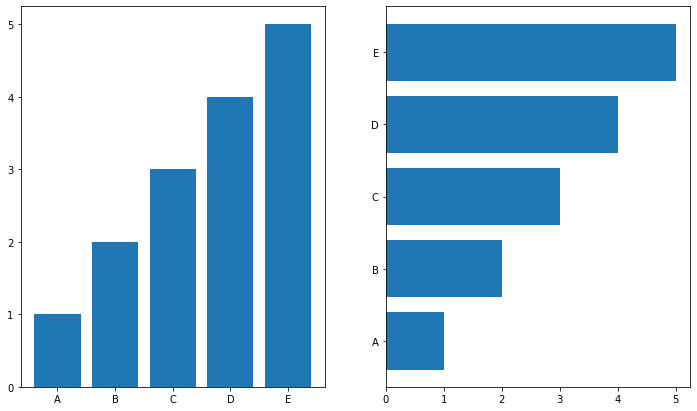

In [3]:
# 서브플롯 1행 2열로 만들기
fig, axes = plt.subplots(1, 2, figsize=(12, 7))

x = list('ABCDE')
y = np.array([1, 2, 3, 4, 5])

axes[0].bar(x, y)
axes[1].barh(x, y)

plt.show()

## 실습용 데이터셋
- Student Score Dataset

In [7]:
student = pd.read_csv('../../../data/exams.csv')
# student.head()
student.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
730,male,group D,associate's degree,free/reduced,none,57,43,44
834,female,group D,high school,free/reduced,completed,40,54,57
557,male,group A,master's degree,standard,none,82,79,80
975,male,group B,some high school,standard,none,54,48,44
893,female,group B,associate's degree,free/reduced,none,38,55,48


In [9]:
student.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,male,group C,some college,standard,none,NaN,NaN,NaN
freq,507,312,230,649,641,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.817000,69.612000,68.363000
std,NaN,NaN,NaN,NaN,NaN,15.076366,14.858271,15.499079
min,NaN,NaN,NaN,NaN,NaN,22.000000,30.000000,24.000000
25%,NaN,NaN,NaN,NaN,NaN,56.000000,59.000000,58.000000
50%,NaN,NaN,NaN,NaN,NaN,68.000000,70.000000,68.000000
75%,NaN,NaN,NaN,NaN,NaN,77.250000,80.000000,79.000000


### Multiple Bar Plot
- 그룹으로 묶고 시각화

In [14]:
# 성별로 그룹화
# 성별 -> 인종 카운팅 -> 정렬(크기 순에서 그룹 A B C 순으로)
group = student.groupby('gender')['race/ethnicity'].value_counts().sort_index()
display(group)
# print(student['gender'].value_counts())

gender  race/ethnicity
female  group A            37
        group B           104
        group C           147
        group D           135
        group E            70
male    group A            35
        group B           103
        group C           165
        group D           126
        group E            78
Name: race/ethnicity, dtype: int64

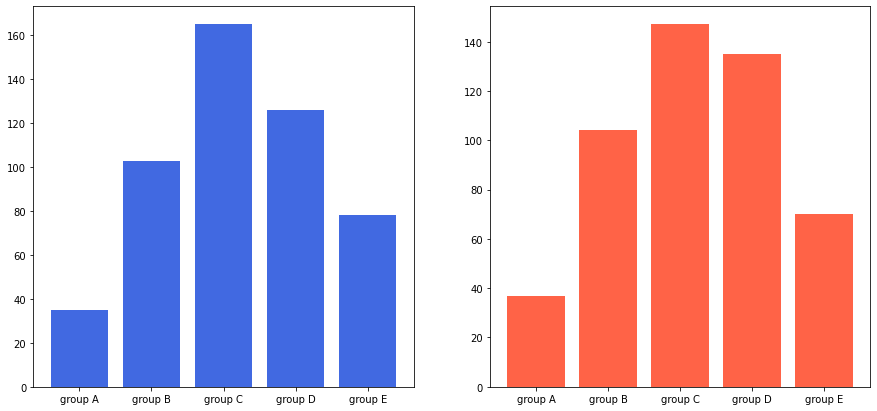

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], color='tomato')
plt.show()

- 남자와 여자의 y축 범위가 다르다.
- scale를 맞추는게 좋다.

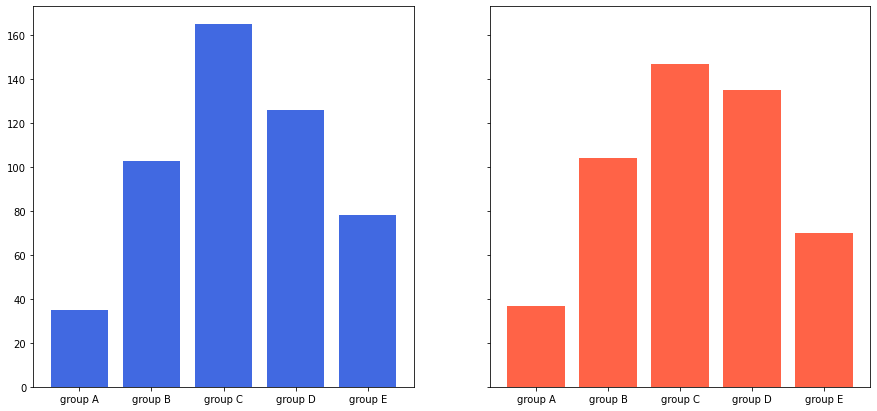

In [19]:
# sharey = True 를 통해 스케일을 맞춤
# 또는 개별적으로 y축 범위를 정할 수도 있음 -> ylim 사용
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)
axes[0].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], color='tomato')

plt.show()

### Stacked Bar Plot
- bottom 파리미터를 사용해서 아래 공간을 비워둘 수 있음.
- 밑에 위치한 남성 데이터의 분포는 이해하기 쉽다
- 하지만 위에 위치한 여성 데이터의 분포를 이해하기 어려움

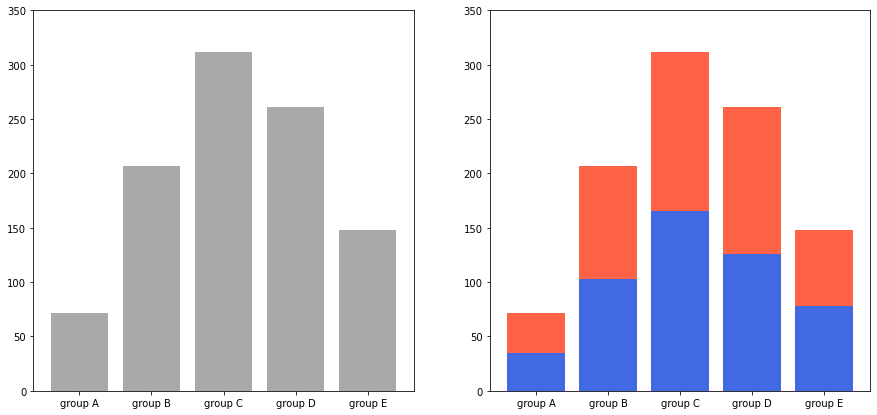

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

group_cnt = student['race/ethnicity'].value_counts().sort_index()
axes[0].bar(group_cnt.index, group_cnt, color='darkgray')
axes[1].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], bottom=group['male'], color='tomato')

# y축 범위 맞춰주기
for ax in axes:
    ax.set_ylim(0, 350)
    
plt.show()

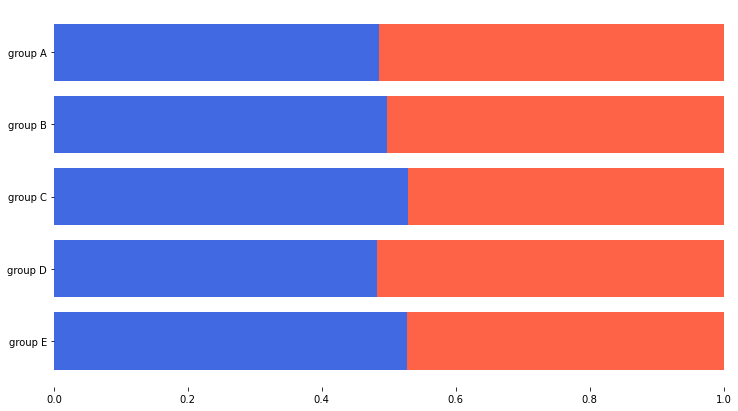

In [25]:
# Percentage Stacked bar plot
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

group = group.sort_index(ascending=False) # 역순 정렬
total=group['male']+group['female'] # 각 그룹별 합

# horizontal 
ax.barh(group['male'].index, group['male']/total, 
        color='royalblue')

ax.barh(group['female'].index, group['female']/total, 
        left=group['male']/total, 
        color='tomato')

ax.set_xlim(0, 1)

# 그래프의 테두리들을 없앰 -> spines 메소드 사용
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

### Grouped Bar Plot
- x축 조정
- width 조정
- xticks 조정
- 원래 x축이 0, 1, 2, 3로 시작한다면 - 한 그래프는 0-width/2, 1-width/2, 2-width/2 로 구성하면 되고 - 한 그래프는 0+width/2, 1+width/2, 2+width/2 로 구성하면 됩니다.

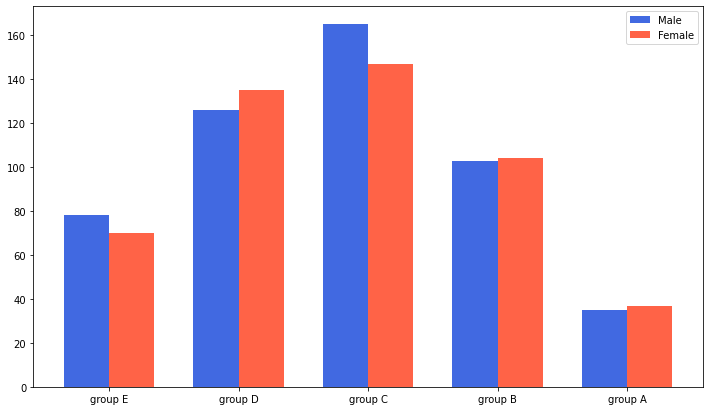

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

idx = np.arange(len(group['male'].index))
width=0.35

ax.bar(idx-width/2, group['male'], 
       color='royalblue',
       width=width, label='Male')

ax.bar(idx+width/2, group['female'], 
       color='tomato',
       width=width, label='Female')

ax.set_xticks(idx)
ax.set_xticklabels(group['male'].index)
ax.legend()    
    
plt.show()

- index i(zero-index)에 대해서는 다음과 같이 x좌표를 계산할 수 있습니다.
- $x+\frac{-N+1+2\times i}{2}\times width$
- 하지만 seaborn 패키지를 통해 더 쉽게 구현이 가능함

### 정확한 비교
- 정확한 정보를 위해서 y축을 정확히 조정할 필요가 있음.

In [28]:
score = student.groupby('gender').mean().T
score

gender,female,male
math score,64.527383,69.043393
reading score,73.572008,65.761341
writing score,73.468560,63.398422


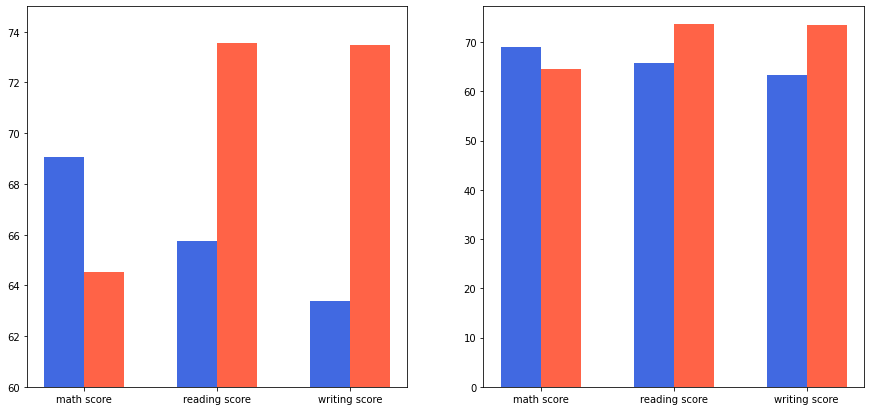

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

idx = np.arange(len(score.index))
width=0.3

for ax in axes:
    ax.bar(idx-width/2, score['male'], 
           color='royalblue',
           width=width)

    ax.bar(idx+width/2, score['female'], 
           color='tomato',
           width=width)

    ax.set_xticks(idx)
    ax.set_xticklabels(score.index)

axes[0].set_ylim(60, 75)
    
plt.show()

### 공간 활용

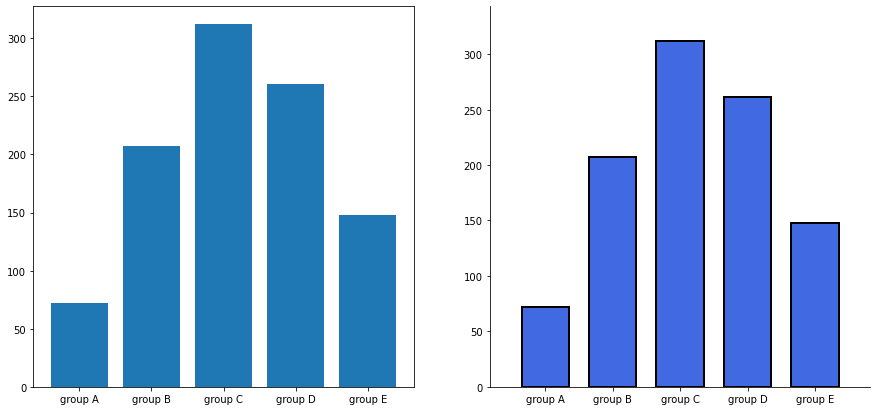

In [32]:
# 인족에 따른 카운팅
group_cnt = student['race/ethnicity'].value_counts().sort_index()

fig = plt.figure(figsize=(15, 7))

ax_basic = fig.add_subplot(1, 2, 1)
ax = fig.add_subplot(1, 2, 2)

# 기본 막대 그래프
ax_basic.bar(group_cnt.index, group_cnt)

# 공간 활용
ax.bar(group_cnt.index, group_cnt,
       width=0.7, # 두께 조정
       edgecolor='black',  # 테두리 색깔
       linewidth=2,  # 막대 테두리 두께
       color='royalblue'  # 색 지정
      )

ax.margins(0.1, 0.1)  # 테두리와의 마진 조정

# 변을 제거해서 막힌 느낌을 없앰
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

### 오차 막대

In [33]:
score_var = student.groupby('gender').std().T
score_var

gender,female,male
math score,15.016988,14.812467
reading score,14.571989,14.115988
writing score,14.695193,14.635730


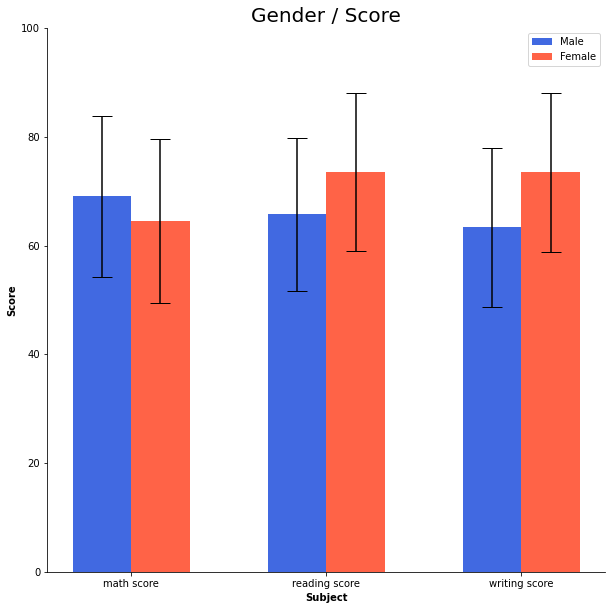

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

idx = np.arange(len(score.index))
width=0.3

# y축에 에러범위를 지정 (표준편차)
# capsize를 통해서 범위를 지정
ax.bar(idx-width/2, score['male'], 
       color='royalblue',
       width=width,
       label='Male',
       yerr=score_var['male'],
       capsize=10
      )

ax.bar(idx+width/2, score['female'], 
       color='tomato',
       width=width,
       label='Female',
       yerr=score_var['female'],
       capsize=10
      )

ax.set_xticks(idx)
ax.set_xticklabels(score.index)
ax.set_ylim(0, 100)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend()
ax.set_title('Gender / Score', fontsize=20)
ax.set_xlabel('Subject', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')

plt.show()